In [2]:
import numpy as np
import scipy as sp
from matplotlib import pyplot as plt

# Projeto 4 - Sinais e Sistemas em Tempo Discreto - 2023/01
# Identificação
## Nome: Samuel Andrade de Matos
## Matrícula: 17/0155943

# Funções utilizadas.

Coloque abaixo as funções desenvolvidas para este projeto.

In [345]:
#Código das funções utilizadas.
import warnings
warnings.filterwarnings("ignore")

def dft_1_passo_fft(x):
    N = len(x)
    x_par = np.zeros(N)
    x_impar = np.zeros(N)
    Xk = np.zeros(N)


    if N == 1:
        return x
    else:
        for i in range(N):
            if i % 2 == 0:
                x_par[i] = x[i]
            else:
                x_impar[i] = x[i]
        Xk_par = dft(x_par)
        Xk_impar = dft(x_impar)
        Wn = np.exp(-2 * np.pi / N)
        for i in range(N):
            Xk[i] = Xk_par[i] + (Wn**i) * Xk_impar[i]
        return Xk


def dft(x):
    Xr = np.zeros(len(x))
    for i in range(len(x)):
        for j in range(len(x)):
            # Xr = somatório de x[n] * e^(-2j*pi*r*n/N) de n = 0 até N-1
            Xr[i] += x[j] * np.exp(-2j * np.pi * i * j / len(x))
    return Xr

def mae(x, y):
    r = 0
    for i in range(len(x)):
        r += np.abs(x[i] - y[i])
    return r

def zeropad(x, n):
    x_zp = np.zeros(n)
    for i in range(len(x)):
        x_zp[i] = x[i]
    return x_zp

def h_filter(n = 0):
    h = np.genfromtxt('filtro.txt')
    if n == 0:
        return h
    else:
        h = zeropad(h,n)
        return h

#N é a ordem do filtro, fc é a frequência de corte e fs é a frequência de amostragem.
def h_lowpass(data,N, fc, fs):
    b, a = sp.signal.butter(N, fc, 'lowpass', fs=fs)
    h = sp.signal.lfilter(b, a, data)
    return h

def h_lowpass_centralizado(data, N, fc, fs):
    w = np.linspace(0, 2 * np.pi * (1 - 1/N), N)
    h = h_lowpass(data, N, fc, fs)
    e = np.exp(-1j * w * (N - 1) / 2)
    h = h * e
    return h

def hOmegaCentralizdo(fc, fs):
    w = np.linspace(0, 2 * np.pi, 100)
    h = np.zeros(w.size)
    Fk = 2*np.pi*fc/(fs / 2)
    nk = int(w.size * Fk / (2 * np.pi))
    for i in range(w.size):
        if i <= nk or i >= w.size - nk:
            h[i] = 1
    e = np.exp(-1j * w * (w.size - 1) / 2)
    h = h * e
    return h

def H_Omega(fc, fs):
    w = np.linspace(0, 2 * np.pi, 100)
    h = np.zeros(w.size)
    Fk = 2*np.pi*fc/(fs / 2)
    nk = int(w.size * Fk / (2 * np.pi))
    for i in range(w.size):
        if i <= nk or i >= w.size - nk:
            h[i] = 1
    return h

def filtfilt(h, x):
    #Calcula-se a convolução de x com h.
    y1 = sp.signal.convolve(x, h, mode='full')

    #Reverte y1
    y2 = y1[::-1]

    #Calcula-se a convolução de y2 com h.
    y3 = sp.signal.convolve(y2, h, mode='full')

    #Reverte y3
    y = y3[::-1]

    return y

def h_amostrado(h, N):
    x_amostrado = np.zeros(N)
    stepSize = h.size // N
    for i in range(N):
        x_amostrado[i] = h[i*stepSize]
    return x_amostrado

def h_amostrado_centralizado(h, N):
    x_amostrado = np.zeros(N)
    stepSize = h.size // N
    w = np.linspace(0, 2 * np.pi * (1 - 1/N), N)
    e = np.exp(-1j * w * (N - 1) / 2)
    for i in range(N):
        x_amostrado[i] = h[i*stepSize]
    x_amostrado = x_amostrado * e
    return x_amostrado

# Questão 1

Considere um sinal $x\left[n\right]$ com 16 amostras:

$$
x\left[n\right] = \left\{ 1, 2, 3, 4, 5, 6, 7, 8, 8, 7, 6, 5, 4, 3, 2, 1\right\}
$$


## Questão 1a (1.0 ponto)

Calcule a DFT do sinal através da equação:

$$
X\left[k\right] = \sum_{n = 0}^{N-1} x\left[n\right] W_{N}^{kn}
$$

com $W_{N} = e^{-\frac{2 \pi}{N}}$.

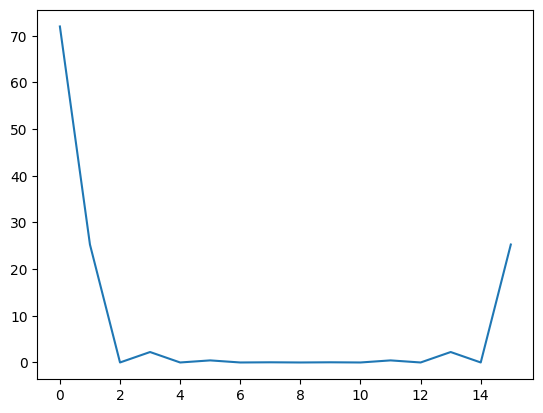

In [4]:
#Resposta da questão 1a

x = [1, 2, 3, 4, 5, 6, 7, 8, 8, 7, 6, 5, 4, 3, 2, 1]
Xk1 = dft(x)
plt.plot(np.abs(Xk1))


## Questão 1b (1.0 ponto)

Considere a separação do sinal $x\left[n\right]$ em suas amostras pares e ímpares, $x_e\left[n\right]$ e $x_o\left[n\right]$, respectivamente. 

Calcule a DFT do sinal $x\left[n\right]$ através da equação:

$$
\hat{X}\left[k\right] = X_e\left[k\right] + W_{N}^{k} X_o\left[k\right]
$$

Compare as duas DFTs e calcule o erro médio absoluto (MAE) entre as DFTs calculadas pelas duas formas:

$$
MAE = \sum_{i = 0}^{N-1} \left| X\left[i\right] - \hat{X}\left[i\right]\right|
$$

MAE = 4.896921840891977


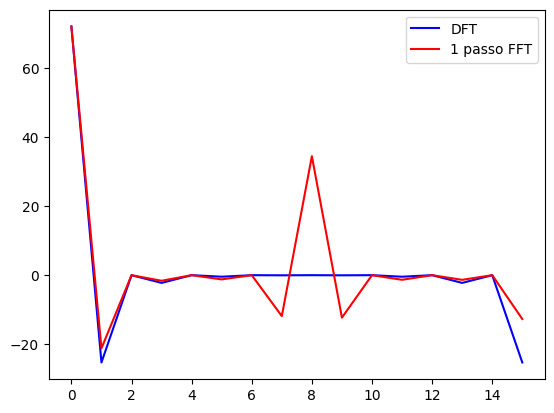

In [5]:
#Resposta da questão 1b
Xk2 = dft_1_passo_fft(x)

error = mae(Xk1, Xk2) / max(Xk1.size, Xk2.size)

print(f'MAE = {error}')

plt.plot(Xk1, 'b')
plt.plot(Xk2, 'r')
plt.legend(['DFT', '1 passo FFT'])


# Questão 2

O arquivo "potencia.txt" contém dados da envoltória real de um tom senoidal amostrado a uma taxa de $200$ amostras / segundo. Para a separação do desvanecimento em larga escala é necessário filtrar esse sinal com um filtro passa-baixas com frequência de corte em torno de $5$ Hz.


## Questão 2a (1.0  ponto)

Projete um filtro digital com a especificação desejada. Podem ser utilizadas as funções de design de filtro da PySDR (https://pysdr.org/content/filters.html), da própria biblioteca scipy (https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.butter.html) ou mesmo bibliotecas web (http://t-filter.engineerjs.com/) . Plote a resposta em frequência e a resposta ao impulso do filtro projetado. 

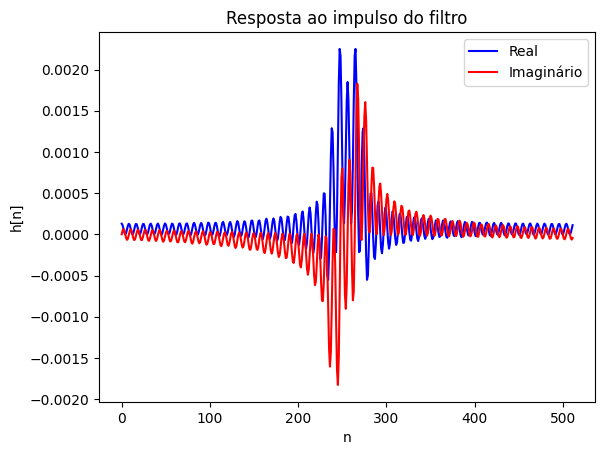

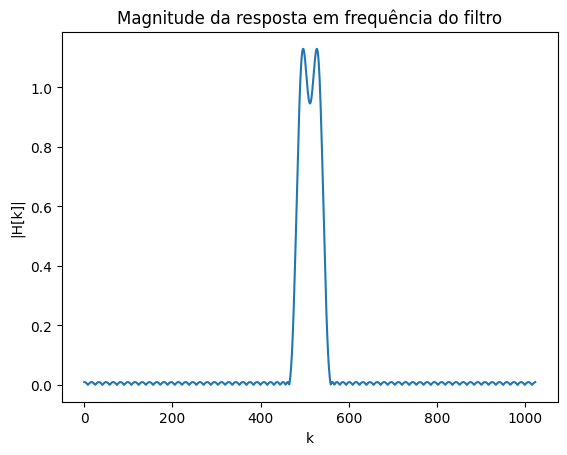

In [6]:
#Resposta da questão 2a
h = h_filter()
H = sp.fft.ifftshift(sp.fft.ifft(sp.fft.ifftshift(h), 512))

plt.title('Resposta ao impulso do filtro')
plt.plot(np.real(H),'b')
plt.plot(np.imag(H), 'r')
plt.xlabel('n')
plt.ylabel('h[n]')
plt.legend(['Real', 'Imaginário'])
plt.show()

H_freq = sp.fft.fftshift(np.abs(sp.fft.fft(h, 1024)))

plt.title('Magnitude da resposta em frequência do filtro')
plt.plot(H_freq)
plt.xlabel('k')
plt.ylabel('|H[k]|')
plt.show()





## Questão 2b (1.0 ponto)

Escreva uma função para processar uma janela de $N$ amostras do sinal desejado. $N$ deve ser escolhido em torno de 1 segundo de sinal, aproximadamente. A filtragem deve ser feita no domínio da DFT (pode ser utilizada alguma função para cálculo da fft em Python, como a função fft da biblioteca numpy).

In [7]:
#Resposta da questão 2b

#Processa uma janela de N amostras do sinal x filtrando utilizando o filtro h(de tamanho K), retornando o sinal y
#de tamanho N.
def filter_1s(x,h, N, offset = 0):
    xk = np.zeros(N)
    xk[N:] = 0
    xk[:N] = x[offset:offset + N]
    Xk = sp.fft.fft(xk)
    Hk = np.conj(sp.fft.fft(h, N))
    
    Yk = Xk * Hk
    
    return Yk

## Questão 2c (1.0  ponto)

Escreva uma função para combinar a saída do processamento de cada janela na saída do sistema, utilizando **um** dos métodos vistos (*overlap and add* ou *overlap and save*). Indique claramente o método escolhido.


In [8]:
#Resposta da questão 2c

sinal = np.loadtxt("potencia.txt")

def overlapAndSave(x,h, N):
    y = np.empty_like(x)
    offset = 0
    K = h.size    
    NK = N - K + 1
    iteracao = 0
    low = 0
    high = 0

    xm = np.zeros(N)
    while offset < x.size:
        low = offset
        high = min(offset + N, x.size) - offset
        xm = sp.fft.ifft(filter_1s(x,h, high, low))
        end = min(offset + NK, x.size) - offset
        y[offset:offset + end] = xm[:end]
        offset += NK
        iteracao += 1

    return y

## Questão 2d (1.0  ponto)

Plote o sinal de entrada e saída do sistema dado tanto pelo processamento em janelas como pelo processamento do sinal completo. Pode ser utilizada alguma função da biblioteca do python para calcular a saída do sistema usando o sinal completo.

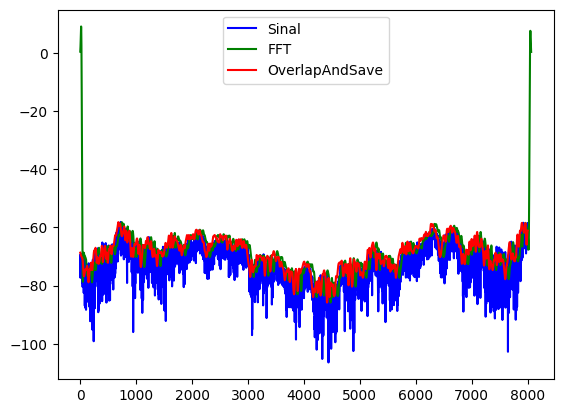

In [9]:
#Resposta da questão 2d
h = h_filter()
Ym = overlapAndSave(sinal,h, 200)
K = h.size
N = sinal.size
Xk = sp.fft.fft(sinal, K + N - 1)
Hk = sp.fft.fft(h, K + N - 1)
Yk = Xk * Hk
Yfft = sp.fft.ifft(Yk)

plt.plot(sinal, 'b')
plt.plot(Yfft, 'g')
plt.plot(Ym, 'r')
plt.legend(['Sinal', 'FFT', 'OverlapAndSave'])
plt.show()

# Questão 3

A equação diferença para um filtro FIR de tamanho $N$ pode ser escrita como:

$$
\begin{align}
	y\left[n\right] &= h_0 x\left[n\right] + h_1 x\left[n-1\right] + h_2 x\left[n-2\right] + h_3 \left[n-3\right] + \ldots + h_{N-1} x\left[n - \left(N- 1\right)\right] \\
	       &= \sum_{k=0}^{N-1} h_k x\left[n - k\right] 
\end{align}
$$

Os coeficientes do filtro, ou \textit{taps}, são expressados usando a variável $h_k$ para enfatizar que os próprios coeficientes representam a resposta ao impulso do filtro. A resposta em frequência do filtro é:

$$
\begin{align}
	H\left( \Omega \right) = \frac{Y\left( \Omega \right)}{X\left( \Omega \right)} = \sum_{k=0}^{N-1} h_k e^{-j \Omega k}
\end{align}
$$

Como $H\left( \Omega \right)$ é uma função com período $2 \pi$ da variável contínua $\Omega$, é suficiente especificar $H\left( \Omega \right)$ em apenas um período $0 \leq \Omega < 2 \pi$. 

Em muitas aplicações, a resposta em magnitude desejada do filtro $\left|H_d \left( \Omega \right)\right|$ é conhecida, mas não os coeficientes $h_k$ do filtro. A questão é, então, determinar os coeficientes do filtro a partir da resposta em magnitude desejada. Podemos fazer isso simplesmente amostrando a resposta em frequência desejada $\left|H_d \left( \Omega \right)\right|$ com $N$ amostras em um período, e então fazendo a DFT inversa dessas amostras (obtendo $h\left[n\right]$). Note que a definição dos coeficientes $h_k$ é suficiente para determinar o sistema do filtro FIR. Além disso, como $H \left( \Omega \right)$ foi obtido amostrando $\left|H_d \left( \Omega \right)\right|$ para algumas frequências, garantimos que a resposta em frequência do filtro projeto será igual a resposta em frequência desejada ao menos nos valores de amostragem. Finalmente, observe que, ao fazer a DFT inversa, alguns coeficientes $h_k$ podem ter uma pequena componente imaginária que deve ser descartada para o projeto de um filtro real. 



## Questão 3a (1.0  ponto)

Considere então um sinal de ECG amostrado a uma taxa de $500$ Hz. Projete um filtro digital FIR através da amostragem de frequência passa-baixas com frequência de corte igual a $50$ Hz. 

Plote a resposta ao impulso $h\left[n\right]$ e a resposta em frequência $H\left(\Omega\right)$ do filtro para $N = 21$, $N = 31$ e $N = 41$. Compare os filtros com a resposta em frequência desejada. 

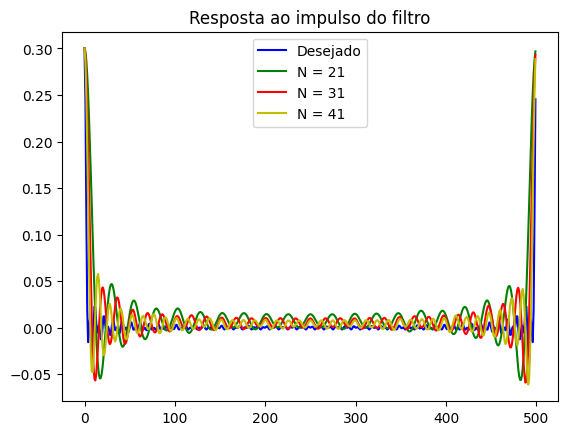

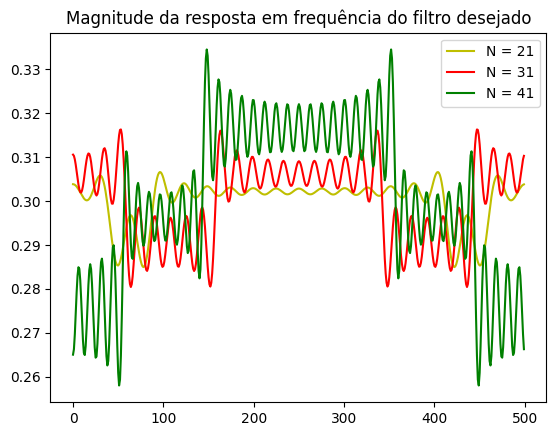

In [386]:
#Resposta da questão 3a
fc = 50
fs = 500
fnyq = fs / 2
Omega = np.linspace(0, 2 * np.pi, 500)
HdeOmega = np.where((np.mod(Omega, 2 * np.pi) < 2 * np.pi/5) | (np.mod(Omega, 2 * np.pi) > 2 * np.pi - np.pi/5), 1, 0)
#HdeOmega = np.hstack((np.ones(50), np.zeros(400), np.ones(50)))
hn = sp.fft.ifft(HdeOmega).real

N = 21
H21 = h_amostrado(hn, N)
N = 31
H31 = h_amostrado(hn, N)
N = 41
H41 = h_amostrado(hn, N)

h21 = sp.fft.fft(sp.fft.ifft(H21), 500)
h31 = sp.fft.fft(sp.fft.ifft(H31), 500)
h41 = sp.fft.fft(sp.fft.ifft(H41), 500)

plt.title('Resposta ao impulso do filtro')
plt.plot(hn, 'b')
plt.plot(h21,'g')
plt.plot(h31, 'r')
plt.plot(h41, 'y')
plt.legend(['Desejado', 'N = 21', 'N = 31', 'N = 41'])
plt.show()

H_fft = sp.fft.fftshift(np.abs(sp.fft.fft(hn)))
H_fft21 = sp.fft.fftshift(np.abs(sp.fft.fft(H21, 500)))
H_fft31 = sp.fft.fftshift(np.abs(sp.fft.fft(H31, 500)))
H_fft41 = sp.fft.fftshift(np.abs(sp.fft.fft(H41, 500)))

plt.title('Magnitude da resposta em frequência do filtro desejado')
#plt.plot(np.abs(H_fft), 'b')
plt.plot(np.abs(H_fft21),'y')
plt.plot(np.abs(H_fft31), 'r')
plt.plot(np.abs(H_fft41), 'g')
plt.legend(['N = 21', 'N = 31', 'N = 41'])
plt.show()

## Questão 3b (1.0  ponto)

A resposta ao impulso do filtro do item anterior deveria ser uma função *sinc*, que é uma função com suporte infinito. Porém, a amostragem amostra apenas a parte para $n$ positivo, gerando uma descontinuidade e uma resposta em frequência mais pobre. Uma forma de melhorar essa amostragem é centralizar a função *sinc* - para isso, devemos multiplicar a resposta em frequência do filtro $H\left(\Omega\right)$ por $e^{-j \Omega \frac{\left(N - 1\right)}{2}}$. Utilize essa técnica para gerar novos filtros com $N = 21$, $N = 31$ e $N = 41$. Compare os filtros com os filtros do item anterior com o mesmo tamanho.

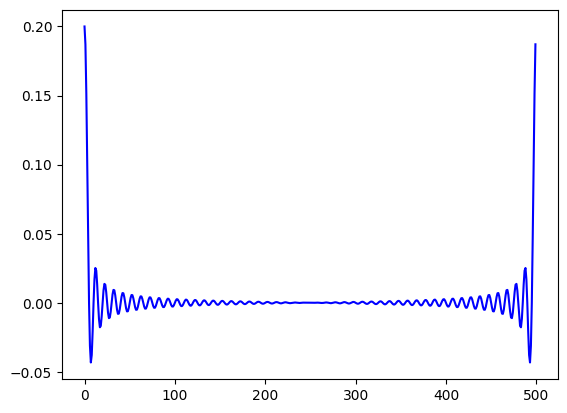

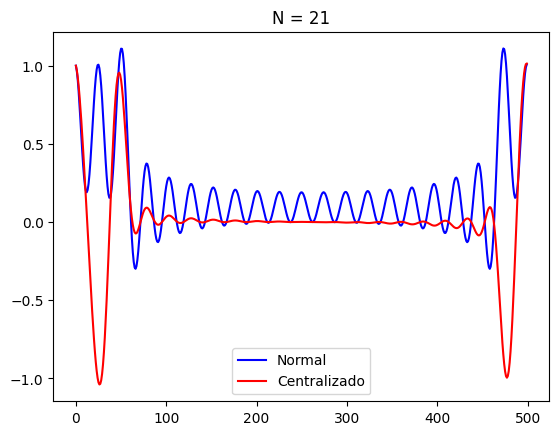

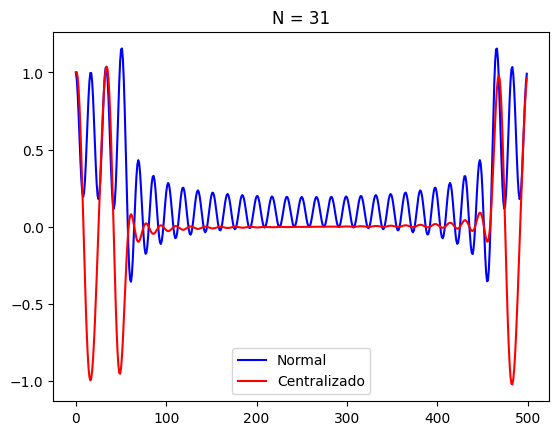

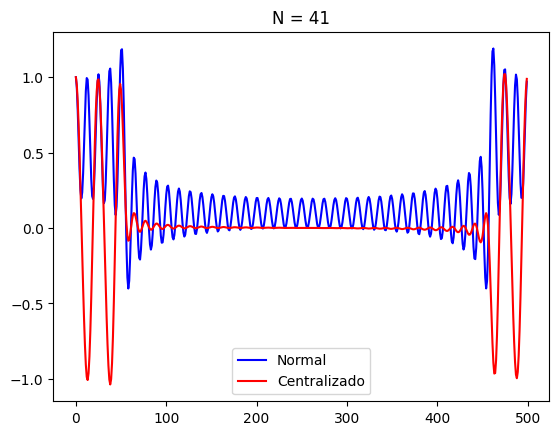

In [352]:
#Resposta da questão 3b
Omega2 = np.linspace(-np.pi, np.pi, 500)
HdeOmega2 = np.hstack((np.ones(50), np.zeros(400), np.ones(50)))
hn2 = sp.fft.ifft(HdeOmega2)

plt.plot(hn2, 'b')
plt.show()

N = 21
h21Centered = sp.fft.fft(sp.fft.ifft(h_amostrado_centralizado(HdeOmega2, N)),500)
N = 31
h31Centered = sp.fft.fft(sp.fft.ifft(h_amostrado_centralizado(HdeOmega2, N)),500)
N = 41
h41Centered = sp.fft.fft(sp.fft.ifft(h_amostrado_centralizado(HdeOmega2, N)),500)

plt.title('N = 21')
plt.plot(h21, 'b')
plt.plot(h21Centered, 'r')
plt.legend(['Normal', 'Centralizado'])
plt.show()

plt.title('N = 31')
plt.plot(h31, 'b')
plt.plot(h31Centered, 'r')
plt.legend(['Normal', 'Centralizado'])
plt.show()

plt.title('N = 41')
plt.plot(h41, 'b')
plt.plot(h41Centered, 'r')
plt.legend(['Normal', 'Centralizado'])
plt.show()


## Questão 3c (1.0  ponto)

Aplique o filtro com $N = 41$ no sinal do arquivo "noisy\_ecg\_data\_3.mat". Compare o sinal de entrada com o sinal de saída. O que acontece com os picos do ECG? 

y = 5000 yCentered = 5000 sinal = 5000


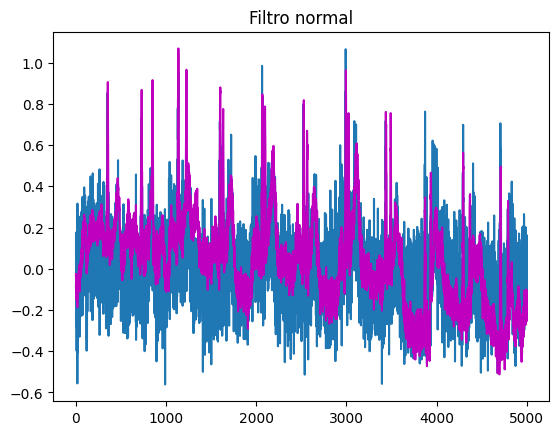

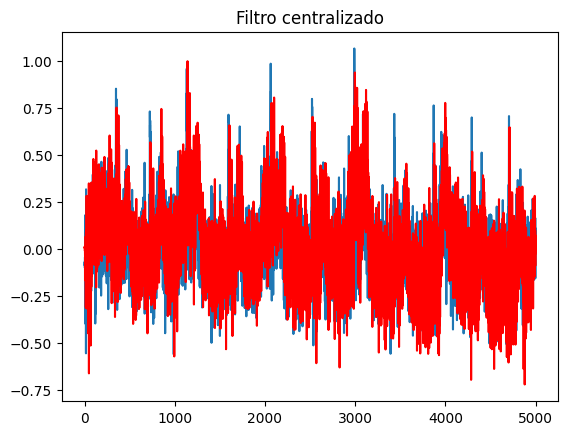

In [394]:
#Resposta da questão 3c

sinal = sp.io.loadmat('noisy_ecg_data_3.mat')['noisy_ecg_3'].ravel()

#h41 = h_amostrado(hn, 41)
#h41Centered = h_amostrado_centralizado(sinal, 41)

y = sp.signal.lfilter(h41, 1, sinal)
yCentered = sp.signal.lfilter(h41Centered, 1, sinal)

print(f'y = {y.size} yCentered = {yCentered.size} sinal = {sinal.size}')

plt.title('Filtro normal')
plt.plot(sinal)
plt.plot(y, 'm')
plt.show()

plt.title('Filtro centralizado')
plt.plot(sinal)
plt.plot(yCentered, 'r')
plt.show()

## Questão 3d (1.0  ponto)

Utilize a técnica de *zero-phase filtering* com o filtro do item anterior. Compare a saída do sistema com e sem a aplicação da técnica.

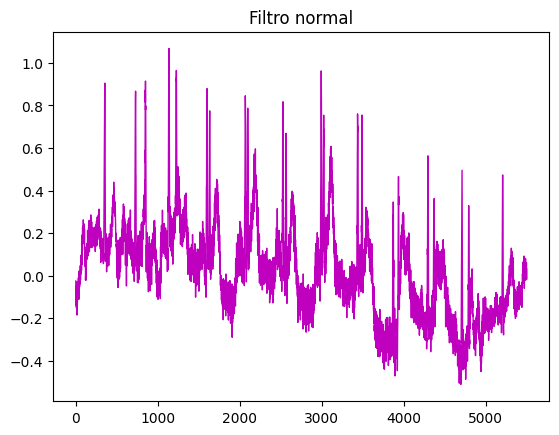

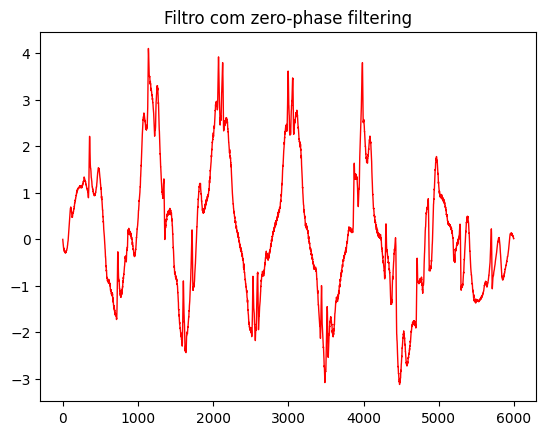

In [395]:
#Resposta da questão 3d

y41Filtfilt = filtfilt(h41, sinal)

y41 = sp.signal.convolve(sinal, h41, mode='full')

plt.title('Filtro normal')
plt.plot(y41, 'm', lw = 1)
plt.show()

plt.title('Filtro com zero-phase filtering')
plt.plot(y41Filtfilt, 'r', lw = 1)
plt.show()